In [1]:
# import the libraries
from PIL import Image
from transformers import AutoModelForCausalLM, AutoTokenizer

In [2]:
# load the model and tokenizer
model_path = "ByteDance/Sa2VA-8B"
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype="auto",
    device_map='cuda:0',
    trust_remote_code=True
).eval()

tokenizer = AutoTokenizer.from_pretrained(
    model_path,
    trust_remote_code=True
)


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Let's write some image and video IO functions
from third_parts import VideoReader
import matplotlib.pyplot as plt

def read_video(video_path, video_interval):
    vid_frames = VideoReader(video_path)[::video_interval]
    for frame_idx in range(len(vid_frames)):
        frame_image = vid_frames[frame_idx]
        frame_image = frame_image[..., ::-1]  # BGR (opencv system) to RGB (numpy system)
        frame_image = Image.fromarray(frame_image)
        vid_frames[frame_idx] = frame_image
    return vid_frames

def show_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [4]:
# Then read the video
VID_PATH = 'assets/videos/gf_exp1.mp4'
vid_frames = read_video(VID_PATH, video_interval=6)

# create a question (<image> is a placeholder for the video frames)
question = "<image>What is the atmosphere of the scene?"
result = model.predict_forward(
    video=vid_frames,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

The scene has a dark and mysterious atmosphere, with the men dressed in suits and ties, and the room being dimly lit. The men are engaged in a serious conversation, and there is a sense of tension in the air.<|im_end|>


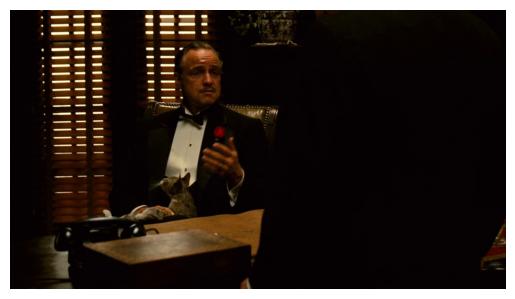

In [5]:
# Let's choose an image and ask the model some question.
image_idx = 60
image = vid_frames[image_idx]
question = "<image>Can you describe what this man holding the cat is doing and how he feels?"

show_img(image)

In [6]:
result = model.predict_forward(
    image=image,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

The man holding the cat appears to be in a formal setting, possibly a business or a sophisticated event. He is wearing a tuxedo and holding a rose, which suggests that he might be attending a special occasion or a formal gathering. The presence of the cat adds a touch of warmth and comfort to the scene. It is difficult to determine his exact emotions from the image, but he might be feeling a mix of formality and affection, as he is both dressed elegantly and holding a cute cat.<|im_end|>


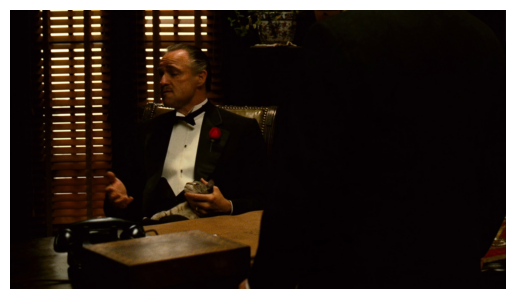

In [7]:
# Let's choose another image and ask the same question.
image_idx = 95
image = vid_frames[image_idx]
question = "<image>Can you describe what this man holding the cat is doing and how he feels?"

show_img(image)

In [8]:
result = model.predict_forward(
    image=image,
    text=question,
    tokenizer=tokenizer,
)
print(result['prediction'])

The man holding the cat appears to be in a formal setting, possibly a restaurant or a club, as he is wearing a tuxedo. He is sitting in a chair and holding a cat in his lap. His expression suggests that he is feeling somewhat displeased or annoyed. It is possible that he is dealing with an unexpected situation or someone who has upset him.<|im_end|>
